In [6]:
import numpy as np
import pandas as pd
from utils import *

font_setting()
cmap = plt.get_cmap("viridis")

In [46]:
### probrem setting
# os
log_dir = "./log/matching/"
seed = 100
# param
U = 1024
theta_FOV = 20

### compute params
seed_seq = np.random.SeedSequence(seed)
np_random = np.random.Generator(np.random.PCG64(seed_seq))
theta_res = np.arctan2(2 * np.tan(theta_FOV / 2), U)
epsilon = 2 * np.sqrt(2) * theta_res
theta_min = epsilon
theta_max = 2 * np.arctan(np.sqrt(2) * np.tan(theta_FOV / 2))

theta_FOV_list = [5, 10, 20, 40, 80]
M_lim_list = [3.5, 4.5, 5.5]
beta_list = [0.0, 0.2, 0.4, 0.6, 0.8]


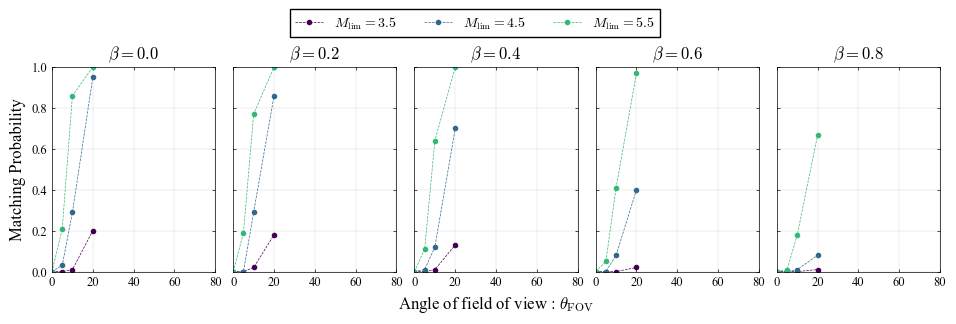

In [49]:
fig, axes = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(4.8*2, 3), dpi=100)

axes[2].set_xlabel("Angle of field of view : $\\theta_{\\mathrm{FOV}}$")
axes[0].set_ylabel('Matching Probability')
axes[0].set_xlim(0, 80)
axes[0].set_ylim(0, 1)

for ii, beta in enumerate(beta_list):
    ax = axes[ii]
    for i, M_lim in enumerate(M_lim_list):
        p = []
        for j, theta_FOV in enumerate(theta_FOV_list):
            path = f"{log_dir}/matching_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
            df = pd.read_csv(path)
            prob = sum(df["unique"]*df["included"])/len(df)
            p.append(prob)
        kwargs = {"ls": "dashed", "lw": 0.5, "color": cmap(i/len(M_lim_list)), "marker":".", "label": "$M_{\\mathrm{lim}}=$"+f"${M_lim}$"}            
        ax.plot([0]+theta_FOV_list, [0]+p, **kwargs)
    # ax.legend()
    ax.set_title( "$\\beta=$"+f"${beta}$")

lines_labels = [axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.02), loc="center", ncol=5)

fig.tight_layout()
fig.savefig(f"{log_dir}/matching_prob.pdf", bbox_inches='tight')